In [9]:
import gym
import numpy as np
import math
from collections import deque

import matplotlib.pyplot as plt
from IPython import display

print(env.observation_space.high)
print(env.observation_space.low)

buckets=(20, 20, 20, 20,)

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [10]:
def get_parameters():
    env = gym.make('CartPole-v1')
    episodes = 10000
    lr = 0.2
    discount = 1.0
    epsilon = 0.25
    Q = (np.zeros(buckets + (env.action_space.n,)))
    print(Q.shape)
    return env, Q, episodes, lr, discount, epsilon 
    

In [11]:
def discretize(obs):
    upper_bounds = [env.observation_space.high[0], 0.5, env.observation_space.high[2], math.radians(50)]
    lower_bounds = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -math.radians(50)]
    ratios = [(obs[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(obs))]
    new_obs = [int(round((buckets[i] - 1) * ratios[i])) for i in range(len(obs))]
    new_obs = [min(buckets[i] - 1, max(0, new_obs[i])) for i in range(len(obs))]
    return tuple(new_obs)

In [12]:
def max_action(s, Q):
    return np.argmax(Q[s[0], s[1], s[2], s[3]])


def choose_action(s, eps, Q):
    if np.random.random() < eps:
        return np.random.randint(0, env.action_space.n)
    else:
        return max_action(s, Q)

In [13]:
def Q_learning():
    
    env, Q, episodes, lr, discount, eps = get_parameters()
    scores = deque(maxlen=100)
    history = []
    
    for e in range(episodes):
              
        s = env.reset()
        s = discretize(s)
        
        reward_sum = 0
        done = False
        while not done:
            
            if e >= episodes-3:
                env.render()          
            
            action = choose_action(s, eps, Q)
            
            s_next, reward, done, info = env.step(action)
            s_next = discretize(s_next)
            
            Q[s[0], s[1], s[2], s[3], action] += lr*(reward + discount*np.max(Q[s_next[0], s_next[1], s_next[2], s_next[3], :]) - Q[s[0], s[1], s[2], s[3], action])

            s = s_next
            reward_sum += reward

        scores.append(reward_sum)
            
        if e % 100 == 0:    
            mean = np.mean(scores)
            history.append(mean)
            print(e , ": ", mean)

        
    env.close()
    return history

(20, 20, 20, 20, 2)
0 :  8.0
100 :  14.81
200 :  17.15
300 :  15.13
400 :  17.27
500 :  15.87
600 :  16.84
700 :  17.86
800 :  17.38
900 :  16.05
1000 :  16.75
1100 :  18.05
1200 :  19.75
1300 :  21.85
1400 :  21.89
1500 :  24.54
1600 :  26.49
1700 :  27.83
1800 :  30.98
1900 :  28.24
2000 :  31.46
2100 :  33.31
2200 :  35.03
2300 :  35.06
2400 :  48.51
2500 :  38.94
2600 :  39.11
2700 :  56.52
2800 :  47.47
2900 :  56.37
3000 :  57.69
3100 :  69.58
3200 :  71.11
3300 :  80.38
3400 :  78.42
3500 :  84.33
3600 :  91.03
3700 :  75.3
3800 :  69.99
3900 :  84.65
4000 :  91.64
4100 :  92.09
4200 :  108.57
4300 :  110.35
4400 :  125.1
4500 :  114.91
4600 :  133.84
4700 :  131.44
4800 :  112.97
4900 :  138.84
5000 :  137.17
5100 :  133.75
5200 :  166.84
5300 :  156.08
5400 :  140.47
5500 :  131.56
5600 :  125.57
5700 :  137.52
5800 :  141.22
5900 :  163.45
6000 :  162.26
6100 :  157.27
6200 :  183.02
6300 :  194.88
6400 :  178.81
6500 :  202.29
6600 :  206.69
6700 :  211.62
6800 :  198.52
690

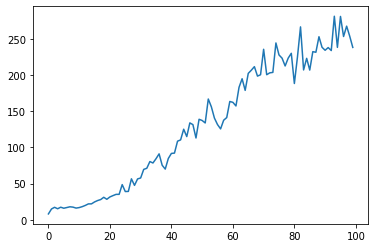

In [14]:
history = Q_learning()

plt.plot(history)
plt.show()

In [15]:
def sarsa():
    
    env, Q, episodes, lr, discount, eps = get_parameters()
    scores = deque(maxlen=100)
    history = []
    
    for e in range(episodes):
        
        s = env.reset()
        s = discretize(s)
        action = choose_action(s, eps, Q) 

        reward_sum = 0
        done = False
        while not done:
            
#             env.render()
            
            if e >= episodes-3:
                env.render()
                
            s_next, reward, done, info = env.step(action)
            s_next = discretize(s_next)
            
            action_next = choose_action(s_next, eps, Q)

            Q[s[0], s[1], s[2], s[3], action] += lr*(reward + discount*Q[s_next[0], s_next[1], s_next[2], s_next[3], action_next] - Q[s[0], s[1], s[2], s[3], action])

            s = s_next
            action = action_next
            reward_sum += reward
        
        scores.append(reward_sum)
            
        if e % 100 == 0:    
            mean = np.mean(scores)
            history.append(mean)
            print(e , ": ", mean)

            
    env.close()
    return history

(20, 20, 20, 20, 2)
0 :  9.0
100 :  14.22
200 :  13.19
300 :  13.3
400 :  13.6
500 :  13.75
600 :  13.5
700 :  14.53
800 :  14.33
900 :  14.02
1000 :  14.4
1100 :  15.0
1200 :  15.96
1300 :  15.09
1400 :  14.28
1500 :  14.96
1600 :  15.38
1700 :  16.68
1800 :  17.03
1900 :  17.24
2000 :  17.88
2100 :  19.6
2200 :  20.74
2300 :  24.01
2400 :  24.93
2500 :  21.24
2600 :  23.94
2700 :  24.38
2800 :  26.85
2900 :  28.21
3000 :  28.76
3100 :  29.26
3200 :  36.26
3300 :  30.93
3400 :  35.83
3500 :  37.26
3600 :  40.44
3700 :  41.22
3800 :  42.88
3900 :  38.71
4000 :  37.03
4100 :  41.39
4200 :  43.35
4300 :  47.43
4400 :  44.55
4500 :  41.79
4600 :  50.08
4700 :  43.51
4800 :  44.99
4900 :  47.04
5000 :  46.91
5100 :  48.79
5200 :  51.14
5300 :  54.36
5400 :  52.91
5500 :  65.27
5600 :  58.28
5700 :  69.93
5800 :  77.84
5900 :  82.59
6000 :  68.73
6100 :  77.47
6200 :  87.23
6300 :  97.3
6400 :  86.8
6500 :  84.31
6600 :  85.85
6700 :  113.19
6800 :  103.22
6900 :  107.98
7000 :  106.94
7100

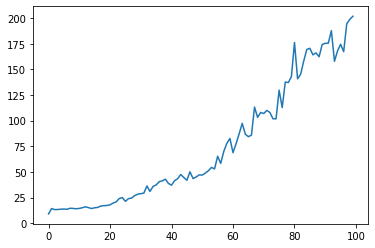

In [16]:
history = sarsa()

plt.plot(history)
plt.show()

In [ ]:
class DQN:
    
    def make_model(self)
        self.model = Sequential()
        self.model.add(Dense(24, input_shape=(observation_space,), activation="relu"))
        self.model.add(Dense(24, activation="relu"))
        self.model.add(Dense(self.action_space, activation="linear"))
        self.model.compile(loss="mse", optimizer=Adam(lr=0.001))